# **Challenge for “Merit Prize” 2024/2025**
##### Grupo 41
##### Raquel Rodrigues (NºIST 106322) e Leonor Figueira (NºIST 106157)

##### NÃO ESQUECER:

the target variable indicated is changed to “malignant" instead of  "has the client subscribed to a term deposit".

#### Pergunta 1)

In [2]:
from sklearn import datasets

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # The target is already in [0, 1] format

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create StratifiedShuffleSplit cross-validation (with stratification)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict on training data and calculate accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"Accuracy on training data of logistic regression model: {train_accuracy:.5f}")

# Predict on test data and calculate accuracy
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Accuracy on testing data of logistic regression model: {test_accuracy:.5f}")


Accuracy on training data of logistic regression model: 0.95980
Accuracy on testing data of logistic regression model: 0.97661


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data and then fits the Logistic Regression model
model = make_pipeline(StandardScaler(), LogisticRegression())

# Evaluate with cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f"Cross-validated accuracy: {scores.mean():.5f} ± {scores.std():.5f}")


Cross-validated accuracy: 0.98246 ± 0.01046


#### Pergunta 2)

In [8]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Silhouette scores: [0.3555006815704848, 0.3446779915028074, 0.13923935320243294, 0.1365569936953837, 0.11943805382362807, 0.08794301704192488, 0.07834574037055249, 0.07212811694181119, 0.09401785785373973, 0.09851453592992197, 0.0861659628401115]
Spearman correlation: -0.7909, P-value: 0.0037


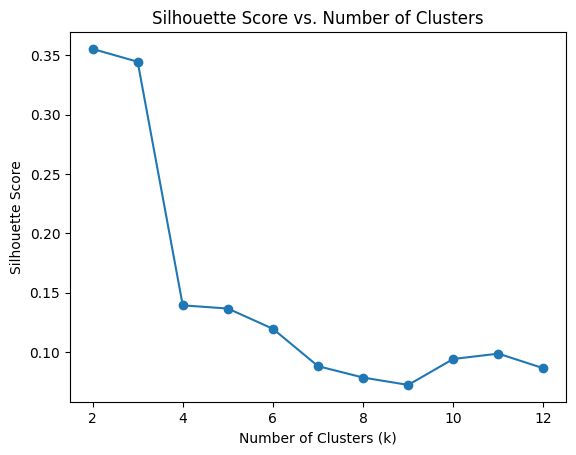

Optimal number of clusters (k) 2


In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import spearmanr

# Range of cluster numbers to evaluate
k_values = range(2, 13)  # Start with 2 clusters, up to 12 clusters
silhouette_scores = []

# Initialize the scaler
scaler = StandardScaler()                               # USAR?
X_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data

# Perform EM clustering for different k
for k in k_values:

    # Initialize and fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, init_params='random_from_data', n_init=3, random_state=42)        # init_params = ?, n_init = ?
    gmm.fit(X_scaled)
    
    # Predict cluster labels
    cluster_labels = gmm.predict(X_scaled)
    
    # Evaluate Silhouette Score
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
    

# Find the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]

print("Silhouette scores:", silhouette_scores)      # Debug

spearman_corr, spearman_p_value = spearmanr(k_values, silhouette_scores)
print(f"Spearman correlation: {spearman_corr:.4f}, P-value: {spearman_p_value:.4f}")

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


print("Optimal number of clusters (k)", optimal_k)



...

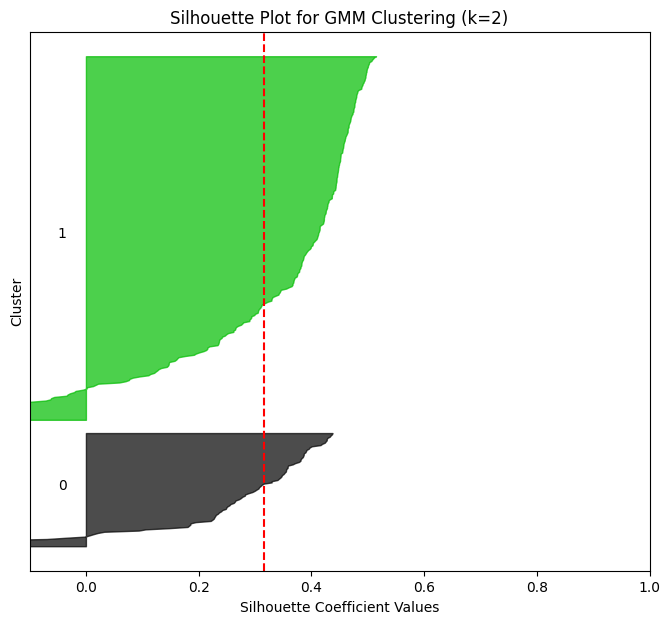

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Initialize and fit GMM for the optimal k
gmm = GaussianMixture(n_components=optimal_k, init_params='random_from_data', n_init=1, random_state=42)    # init_params = ?, n_init = ?
gmm.fit(X_scaled)
cluster_labels = gmm.predict(X_scaled)

# Calculate silhouette scores for each sample
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot the silhouette
fig, ax1 = plt.subplots(1, 1, figsize=(8, 7))

y_lower = 10  # Starting position for the silhouette plots
for i in range(optimal_k):
    # Extract silhouette scores for the current cluster
    cluster_silhouette_values = silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()  # Sort for better visualization

    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    # Color map for the silhouette plots
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * cluster_size, str(i))  # Add cluster labels
    y_lower = y_upper + 10  # Add spacing between plots

# Add average silhouette score as a vertical line
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title(f"Silhouette Plot for GMM Clustering (k={optimal_k})")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster")
ax1.set_yticks([])  # Remove y-axis ticks for clarity
ax1.set_xlim([-0.1, 1])  # Silhouette values range from -1 to 1
plt.show()

#### Pergunta 3)

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Range of possible k-values (number of clusters)
k_values = range(2, 13)  # Example: k-values from 1 to 12

# Initialize an empty list to store probabilities for each k
train_prob_clusters = {}
test_prob_clusters = {}


# Loop through different k-values to train GMM and get probabilities
for k in k_values:
    # Fit the Gaussian Mixture Model (GMM) with k clusters
    em_model = GaussianMixture(n_components=k, random_state=42)
    em_model.fit(X_train)
    
    # Map the training and test sets into probability values of the clusters
    train_probabilities = em_model.predict_proba(X_train)
    test_probabilities = em_model.predict_proba(X_test)
    
    # Store the probabilities for train and test sets for this k-value
    train_prob_clusters[k] = train_probabilities
    test_prob_clusters[k] = test_probabilities

print(test_prob_clusters)

{2: array([[8.45317965e-013, 1.00000000e+000],
       [1.00000000e+000, 7.98725997e-101],
       [9.99999903e-001, 9.74364029e-008],
       [4.79691619e-023, 1.00000000e+000],
       [3.29595693e-028, 1.00000000e+000],
       [1.00000000e+000, 5.15118097e-058],
       [1.00000000e+000, 1.05400216e-207],
       [1.00000000e+000, 3.58578868e-013],
       [1.00000000e+000, 1.08956508e-014],
       [5.37102624e-011, 1.00000000e+000],
       [2.38594015e-010, 1.00000000e+000],
       [1.00000000e+000, 5.87241433e-017],
       [4.51319532e-006, 9.99995487e-001],
       [5.93434266e-001, 4.06565734e-001],
       [3.97311911e-011, 1.00000000e+000],
       [1.00000000e+000, 1.16758100e-041],
       [6.60425533e-007, 9.99999340e-001],
       [1.49677648e-058, 1.00000000e+000],
       [1.74792741e-112, 1.00000000e+000],
       [1.00000000e+000, 6.27211373e-096],
       [8.38060972e-005, 9.99916194e-001],
       [1.28295310e-016, 1.00000000e+000],
       [1.00000000e+000, 3.42801970e-171],
       

#### Pergunta 4)

In [44]:
log_reg_accuracies = []

for k in k_values:
    
    # Now, perform Logistic Regression on the mapped test data
    log_reg = LogisticRegression(max_iter=10000)
    
    # Train Logistic Regression on the probability values (i.e., the mapped data from GMM)
    log_reg.fit(train_prob_clusters[k], y_train)
    
    # Make predictions using the Logistic Regression model
    y_pred = log_reg.predict(test_prob_clusters[k])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    log_reg_accuracies.append(accuracy)
    
    # Print the accuracy for this k-value
    print(f"Accuracy of Logistic Regression with k={k}: {accuracy:.5f}")

Accuracy of Logistic Regression with k=2: 0.92398
Accuracy of Logistic Regression with k=3: 0.06433
Accuracy of Logistic Regression with k=4: 0.74269
Accuracy of Logistic Regression with k=5: 0.51462
Accuracy of Logistic Regression with k=6: 0.70760
Accuracy of Logistic Regression with k=7: 0.73099
Accuracy of Logistic Regression with k=8: 0.77778
Accuracy of Logistic Regression with k=9: 0.65497
Accuracy of Logistic Regression with k=10: 0.56140
Accuracy of Logistic Regression with k=11: 0.60234
Accuracy of Logistic Regression with k=12: 0.66667


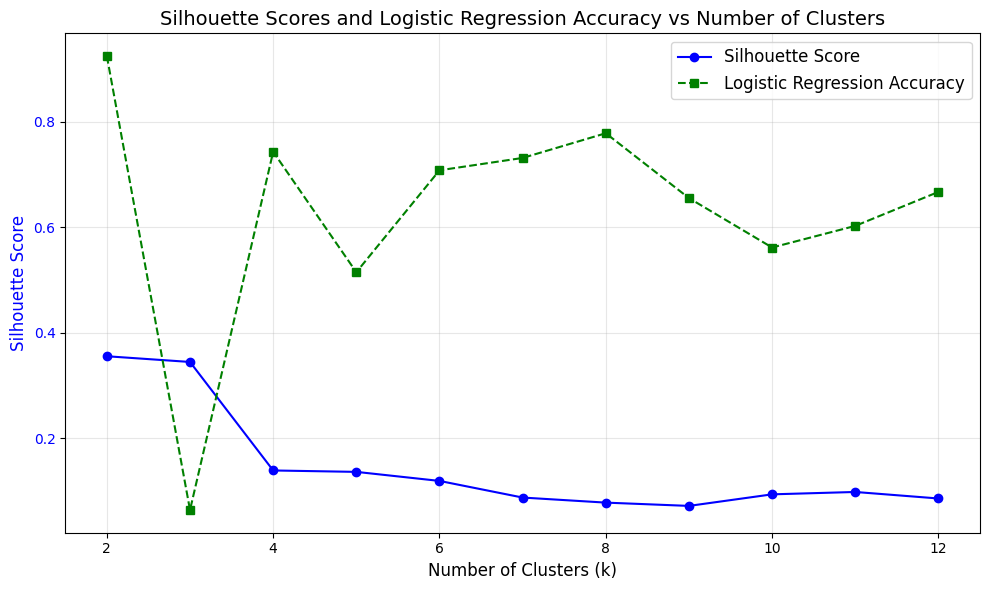

In [46]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot silhouette scores
ax1.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='blue', label='Silhouette Score')
ax1.set_xlabel("Number of Clusters (k)", fontsize=12)
ax1.set_ylabel("Silhouette Score", color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Add logistic regression accuracy to the same plot
ax1.plot(k_values, log_reg_accuracies, marker='s', linestyle='--', color='green', label='Logistic Regression Accuracy')

# Add a grid, legend, and title
ax1.legend(loc="best", fontsize=12)
plt.title("Silhouette Scores and Logistic Regression Accuracy vs Number of Clusters", fontsize=14)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

#### Pergunta 5)

In [56]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize RBF centers without clustering (e.g., random selection)
random_centers = X_train[np.random.choice(X_train.shape[0], size=optimal_k, replace=False)]

# Compute RBF features using random centers
def rbf_features(X, centers, sigma=1.0):
    """Generate RBF features using the Gaussian kernel."""
    features = np.exp(-np.linalg.norm(X[:, np.newaxis] - centers, axis=2)**2 / (2 * sigma**2))
    return features

# Generate RBF features for train and test sets
X_train_rbf_random = rbf_features(X_train, random_centers)
X_test_rbf_random = rbf_features(X_test, random_centers)

# Train logistic regression on these RBF features
log_reg_random = LogisticRegression(max_iter=10000)
log_reg_random.fit(X_train_rbf_random, y_train)
train_pred_random = log_reg_random.predict(X_train_rbf_random)
test_pred_random = log_reg_random.predict(X_test_rbf_random)

# Predict on training data and calculate accuracy
train_acc_no_clustering = accuracy_score(y_train, train_pred_random)

print(f"Accuracy on training data of logistic regression model: {train_acc_no_clustering:.5f}")

# Predict on test data and calculate accuracy
test_acc_no_clustering = accuracy_score(y_test, test_pred_random)

print(f"Accuracy on testing data of logistic regression model: {test_acc_no_clustering:.5f}")



Accuracy on training data of logistic regression model: 0.62563
Accuracy on testing data of logistic regression model: 0.63158


In [57]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Optimal number of clusters from Question 2
k = optimal_k  # Replace this with the actual optimal k from your previous analysis

# Step 1: Perform GMM clustering on training data
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(X_train)

# Cluster centers and variances
centroids = gmm.means_  # Centers of the clusters
covariances = gmm.covariances_  # Covariance matrices
variances = np.array([np.trace(cov) for cov in covariances])  # Simplified variance estimate

# Step 2: Define the RBF transformation
def rbf_transform(X, centroids, variances):
    """Apply RBF transformation to data."""
    transformed = np.zeros((X.shape[0], len(centroids)))
    for i, (mu, var) in enumerate(zip(centroids, variances)):
        transformed[:, i] = np.exp(-np.linalg.norm(X - mu, axis=1)**2 / (2 * var))
    return transformed

# Transform training and test data using RBF
X_train_rbf = rbf_transform(X_train, centroids, variances)
X_test_rbf = rbf_transform(X_test, centroids, variances)

# Step 3: Train logistic regression on RBF-transformed data
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_rbf, y_train)

# Step 4: Evaluate the model
train_pred = log_reg.predict(X_train_rbf)
test_pred = log_reg.predict(X_test_rbf)

# Predict on training data and calculate accuracy
train_acc_with_clustering = accuracy_score(y_train, train_pred)

print(f"Accuracy on training data of logistic regression model: {train_acc_with_clustering:.5f}")

# Predict on test data and calculate accuracy
test_acc_with_clustering = accuracy_score(y_test, test_pred)

print(f"Accuracy on testing data of logistic regression model: {test_acc_with_clustering:.5f}")


Accuracy on training data of logistic regression model: 0.87437
Accuracy on testing data of logistic regression model: 0.93567


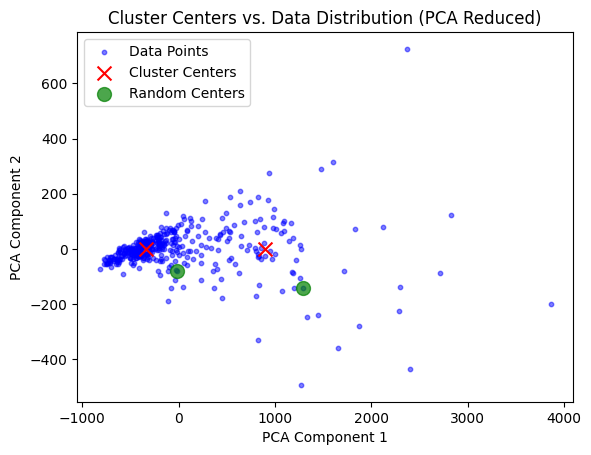

In [50]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce data to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Get cluster centers from GMM
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(X_train)
cluster_centers = gmm.means_

# Project cluster centers to PCA space
cluster_centers_pca = pca.transform(cluster_centers)

# Plot data and cluster centers
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='blue', s=10, label='Data Points', alpha=0.5)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

# Optional: Compare with random centers
random_centers = X_train[np.random.choice(X_train.shape[0], size=optimal_k, replace=False)]
random_centers_pca = pca.transform(random_centers)
plt.scatter(random_centers_pca[:, 0], random_centers_pca[:, 1], c='green', marker='o', s=100, label='Random Centers', alpha=0.7)

plt.legend()
plt.title('Cluster Centers vs. Data Distribution (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


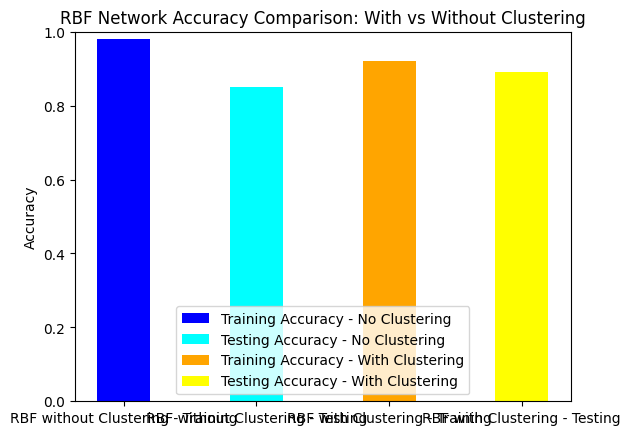

In [59]:
import matplotlib.pyplot as plt

# Data for the plot
categories = ['RBF without Clustering - Training', 'RBF without Clustering - Testing', 
              'RBF with Clustering - Training', 'RBF with Clustering - Testing']
no_clustering = [train_acc_no_clustering, test_acc_no_clustering]
with_clustering = [train_acc_with_clustering, test_acc_with_clustering]

# Create the plot
x = range(len(categories))  # X-axis positions

# Create the bars for RBF without clustering
plt.bar(x[0], train_acc_no_clustering, width=0.4, label='Training Accuracy - No Clustering', color='blue')
plt.bar(x[1], test_acc_no_clustering, width=0.4, label='Testing Accuracy - No Clustering', color='cyan')

# Create the bars for RBF with clustering
plt.bar(x[2], train_acc_with_clustering, width=0.4, label='Training Accuracy - With Clustering', color='orange')
plt.bar(x[3], test_acc_with_clustering, width=0.4, label='Testing Accuracy - With Clustering', color='yellow')

# Add labels and legend
plt.xticks(x, categories)  # Position x-axis labels
plt.ylabel('Accuracy')
plt.title('RBF Network Accuracy Comparison: With vs Without Clustering')
plt.legend()
plt.ylim(0, 1)  # Scale from 0 to 1 for accuracy

# Show the plot
plt.show()


#### Pergunta 6)